# 데이터셋 만들기

##### 1. 데이터 재구성하기

In [1]:
import pandas as pd
import numpy as np

In [2]:
q1 = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/tot_data/2017.01.01.xlsx')
q2 = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/tot_data/2017.02.01.xlsx')
q3 = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/tot_data/2017.03.01.xlsx')
q4 = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/tot_data/2017.04.01.xlsx')
q5 = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/tot_data/2017.05.01.xlsx')
q6 = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/tot_data/2017.06.01.xlsx')
q7 = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/tot_data/2017.07.01.xlsx')
q8 = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/tot_data/2017.08.01.xlsx')
q9 = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/tot_data/2017.09.01.xlsx')
q10 = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/tot_data/2017.10.01.xlsx')
q11 = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/tot_data/2017.11.01.xlsx')
q12 = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/tot_data/2017.12.01.xlsx')


w1 = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/tot_data/2018.01.01.xlsx')
w2 = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/tot_data/2018.02.01.xlsx')
w3 = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/tot_data/2018.03.01.xlsx')
w4 = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/tot_data/2018.04.01.xlsx')
w5 = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/tot_data/2018.05.01.xlsx')
w6 = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/tot_data/2018.06.01.xlsx')
w7 = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/tot_data/2018.07.01.xlsx')
w8 = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/tot_data/2018.08.01.xlsx')
w9 = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/tot_data/2018.09.01.xlsx')
w10 = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/tot_data/2018.10.01.xlsx')
w11 = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/tot_data/2018.11.01.xlsx')
w12 = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/tot_data/2018.12.01.xlsx')

e1 = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/tot_data/2019.01.xlsx')
e2 = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/tot_data/2019.02.xlsx')
e3 = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/tot_data/2019.03.xlsx')
e4 = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/tot_data/2019.04.xlsx')
e5 = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/tot_data/2019.05.xlsx')
e6 = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/tot_data/2019.06.xlsx')
e7 = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/tot_data/2019.07.xlsx')
e8 = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/tot_data/2019.08.xlsx')
e9 = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/tot_data/2019.09.xlsx')
e10 = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/tot_data/2019.10.xlsx')
e11 = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/tot_data/2019.11.xlsx')
e12 = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/tot_data/2019.12.xlsx')

In [3]:
b = q1.columns & q2.columns & q3.columns & q4.columns & q5.columns & q6.columns & q7.columns & q8.columns & q9.columns & q10.columns & q11.columns & q12.columns & w1.columns & w2.columns & w3.columns & w4.columns & w5.columns & w6.columns & w7.columns & w8.columns & w9.columns & w10.columns & w11.columns & w12.columns & e1.columns & e2.columns & e3.columns & e4.columns & e5.columns & e6.columns & e7.columns & e8.columns & e9.columns & e10.columns & e11.columns & e12.columns 

In [6]:
def dataset(a):
    return a[['코드\n번호', '회사명', '업종\n(대)', '업종\n(소)', '코스피코스닥', '주가\n(원)', '시가총액\n(억)',
       '1일\n등락률\n(%)', '5일\n등락률\n(%)', '과거\nROE\n(%)', '과거\nROA\n(%)',
       '과거\nPCR', '고점\nPBR', '저점\nPBR', '5년평균\nPBR', '과거\nPER', '발표\nPER',
       '1년후\nPER', '시가\n배당률\n(%)', '부채\n(억)', '자본\n(억)', '매출액\n(억)',
       '영업이익\n(억)', '순이익(지배)\n(억)', '신고가율\n(%)', '당일\n기관(%)', '당일\n외인(%)',
       '당일\n수급(%)', '주간\n기관(%)', '주간\n외인(%)', '주간\n수급(%)', '고점대비\nPBR괴리율',
       '저점대비\nPBR괴리율', '목표가 \n괴리율\n(%)', '목표\n주가\n(원)', '마지막\n리포트일', '실적\n발표일',
       '1주일\n어닝스', '1달\n어닝스', '3개월 \n어닝스', '6개월 \n어닝스', '12개월 \n어닝스',
       '어닝스\n점수']]

In [ ]:
['코드\n번호', '회사명_x', '업종\n(대)_x', '업종\n(소)_x', '코스피코스닥_x', '주가\n(원)_x', '시가총액\n(억)_x',
       '1일\n등락률\n(%)_x', '5일\n등락률\n(%)_x', '과거\nROE\n(%)_x', '과거\nROA\n(%)_x',
       '과거\nPCR_x', '고점\nPBR_x', '저점\nPBR_x', '5년평균\nPBR_x', '과거\nPER_x', '발표\nPER_x',
       '1년후\nPER_x', '시가\n배당률\n(%)_x', '부채\n(억)_x', '자본\n(억)_x', '매출액\n(억)_x',
       '영업이익\n(억)_x', '순이익(지배)\n(억)_x', '신고가율\n(%)_x', '당일\n기관(%)_x', '당일\n외인(%)_x',
       '당일\n수급(%)_x', '주간\n기관(%)_x', '주간\n외인(%)_x', '주간\n수급(%)_x', '고점대비\nPBR괴리율_x',
       '저점대비\nPBR괴리율_x', '목표가 \n괴리율\n(%)_x', '목표\n주가\n(원)_x', '마지막\n리포트일_x', '실적\n발표일_x',
       '1주일\n어닝스_x', '1달\n어닝스_x', '3개월 \n어닝스_x', '6개월 \n어닝스_x', '12개월 \n어닝스_x',
       '어닝스\n점수_x']

In [7]:
a = []
a.append(dataset(q1))
a.append(dataset(q2))
a.append(dataset(q3))
a.append(dataset(q4))
a.append(dataset(q5))
a.append(dataset(q6))
a.append(dataset(q7))
a.append(dataset(q8))
a.append(dataset(q9))
a.append(dataset(q10))
a.append(dataset(q11))
a.append(dataset(q12))
a_bis = pd.concat(a)
b = []
b.append(dataset(w1))
b.append(dataset(w2))
b.append(dataset(w3))
b.append(dataset(w4))
b.append(dataset(w5))
b.append(dataset(w6))
b.append(dataset(w7))
b.append(dataset(w8))
b.append(dataset(w9))
b.append(dataset(w10))
b.append(dataset(w11))
b.append(dataset(w12))
b_bis = pd.concat(b)
c = []
c.append(dataset(e1))
c.append(dataset(e2))
c.append(dataset(e3))
c.append(dataset(e4))
c.append(dataset(e5))
c.append(dataset(e6))
c.append(dataset(e7))
c.append(dataset(e8))
c.append(dataset(e9))
c.append(dataset(e10))
c.append(dataset(e11))
c.append(dataset(e12))
c_bis = pd.concat(c)

In [8]:
def select_bis(standard_data,test_data):
    merged_data = pd.merge(standard_data,test_data,on = '코드\n번호',how = 'left')
    fin_data = merged_data.drop(columns = ['회사명_x', '업종\n(대)_x', '업종\n(소)_x', '코스피코스닥_x', '주가\n(원)_x', '시가총액\n(억)_x',
       '1일\n등락률\n(%)_x', '5일\n등락률\n(%)_x', '과거\nROE\n(%)_x', '과거\nROA\n(%)_x',
       '과거\nPCR_x', '고점\nPBR_x', '저점\nPBR_x', '5년평균\nPBR_x', '과거\nPER_x', '발표\nPER_x',
       '1년후\nPER_x', '시가\n배당률\n(%)_x', '부채\n(억)_x', '자본\n(억)_x', '매출액\n(억)_x',
       '영업이익\n(억)_x', '순이익(지배)\n(억)_x', '신고가율\n(%)_x', '당일\n기관(%)_x', '당일\n외인(%)_x',
       '당일\n수급(%)_x', '주간\n기관(%)_x', '주간\n외인(%)_x', '주간\n수급(%)_x', '고점대비\nPBR괴리율_x',
       '저점대비\nPBR괴리율_x', '목표가 \n괴리율\n(%)_x', '목표\n주가\n(원)_x', '마지막\n리포트일_x', '실적\n발표일_x',
       '1주일\n어닝스_x', '1달\n어닝스_x', '3개월 \n어닝스_x', '6개월 \n어닝스_x', '12개월 \n어닝스_x',
       '어닝스\n점수_x'],axis = 1)
    
    return fin_data

In [9]:
standard_data = a[0]
p = []
q = []
r = []

for i in range(12):
    test_data = a[i]
    fin_data = select_bis(standard_data,test_data)
    p.append(fin_data)
    p[i].to_excel('2017.0%d.xlsx'%i)
    
for i in range(12):
    test_data = b[i]
    fin_data = select_bis(standard_data,test_data)
    q.append(fin_data)
    q[i].to_excel('2018.0%d.xlsx'%i)
    
for i in range(12):
    test_data = c[i]
    fin_data = select_bis(standard_data,test_data)
    r.append(fin_data)
    r[i].to_excel('2019.0%d.xlsx'%i)

In [34]:
for i in range(12):
    if r[i].shape[0] != 1956:
        print(i)

1


In [37]:
fin_data = select_bis(a[0],c[1])

In [53]:
print(fin_data[fin_data['코드\n번호'].duplicated() == True].index)

Int64Index([364, 1010], dtype='int64')


In [56]:
p[3] = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/code/2017.03.xlsx')
r[1] = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/code/2019.01.xlsx')

In [57]:
df = pd.concat([p[0],p[1],p[2],p[3],p[4],p[5],p[6],p[7],p[8],p[9],p[10],p[11],q[0],q[1]
          ,q[2],q[3],q[4],q[5],q[6],q[7],q[8],q[9],q[10],q[11],r[0],r[1],r[2],r[3],r[4],r[5],r[6],r[7],r[8],r[9],r[10],r[11]])

In [58]:
df.to_excel('total_data.xlsx')

#### 1. 데이터 형식 확인 

In [1]:
import pandas as pd
import numpy as np

In [61]:
df = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/last_data/total_data.xlsx')

KeyboardInterrupt: 

In [3]:
df

,Unnamed: 0,B,C,D,E,F,G,H,I,J,...,AJ,AK,AL,AM,AN,AO,AP,AQ,AR,Unnamed: 44
0,0,A005930,삼성전자,반도체 관련장비 및 부품,종합 반도체,코스피,1833000,2578652,-2.135611,-1.504567,...,2.247688e+06,2017-01-12 00:00:00,2017.01.06,1.114770,9.237779,21.197460,26.782348,57.8,100.0,NaN
1,1,A000660,SK하이닉스,반도체 관련장비 및 부품,종합 반도체,코스피,49300,358905,-1.988072,-0.504541,...,6.319924e+04,2017-01-16 00:00:00,2016.10.25,22.488635,32.255002,91.789540,201.330419,141.2,100.0,NaN
2,2,A005380,현대차,자동차 및 관련부품,완성차,코스피,150500,331516,1.006711,0.000000,...,1.801194e+05,2017-01-12 00:00:00,2016.10.26,-1.533143,0.345457,0.275007,-5.843178,3.1,0.0,NaN
3,3,A015760,한국전력,유틸리티,전력,코스피,44400,285032,-0.448430,2.896871,...,6.042805e+04,2017-01-11 00:00:00,2016.11.03,8.246518,-5.063576,-27.481514,-21.289878,-20.6,20.0,NaN
4,4,A035420,NAVER,IT서비스,인터넷서비스,코스피,794000,261724,0.506329,1.925546,...,1.056273e+06,2017-01-10 00:00:00,2016.10.27,-0.086164,-1.160705,-4.269882,9.819140,37.1,40.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70411,1951,A232330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70412,1952,A215100,로보로보,일반서비스,교육,코스닥,4920,876,5.600000,12.300000,...,0.000000e+00,20190102,20191114,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN
70413,1953,A207720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70414,1954,A208870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


36개월 동안 1956개의 기업이 44개의 피쳐를 갖고 있다는 점에서 올바른 양식을 띄고 있다는 걸 확인할 수 있다.

In [4]:
# 파산 기업 비율 확인 

a = df['C'].isnull().sum()
bankrupt_ratio = a.sum() / 69408 * 100

print("파산 기업 비율 : ",bankrupt_ratio,"%")

파산 기업 비율 :  2.159693407100046 %


### 2. 결측치 확인

In [5]:
import missingno as msno

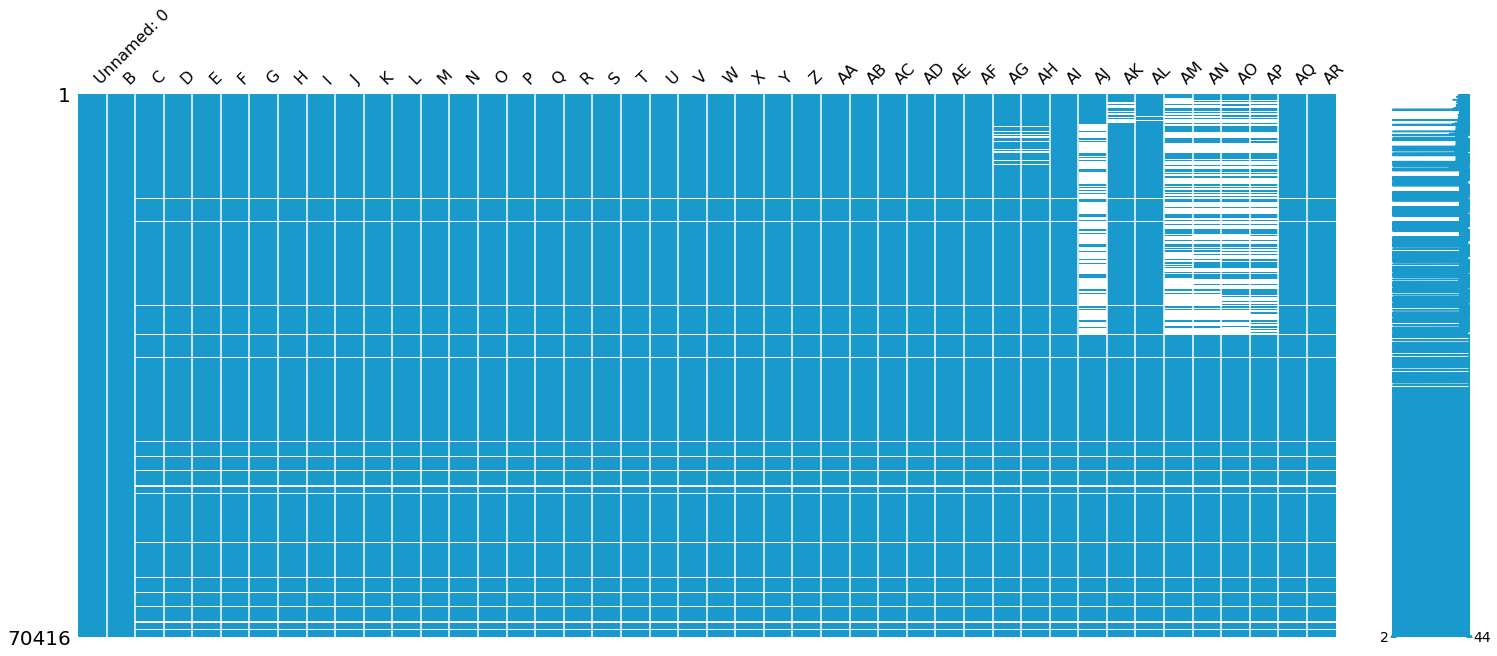

In [6]:
msno.matrix(df=df.iloc[:,0:44], color=(0.1, 0.6, 0.8))

AG, AH, AJ, AK, AM, AN, AO, AP에 많은 결측치가 존재한다는 것을 확인할 수 있다,

실제 결측치이지만 0값으로 표현된 경우도 많다. 

보통 어떤 지표에 0이 존재하지 않는다는 가정하에 0값도 NaN값으로 바꾸어주겠다. 

In [8]:
df_copy = df.replace(0,np.NaN)

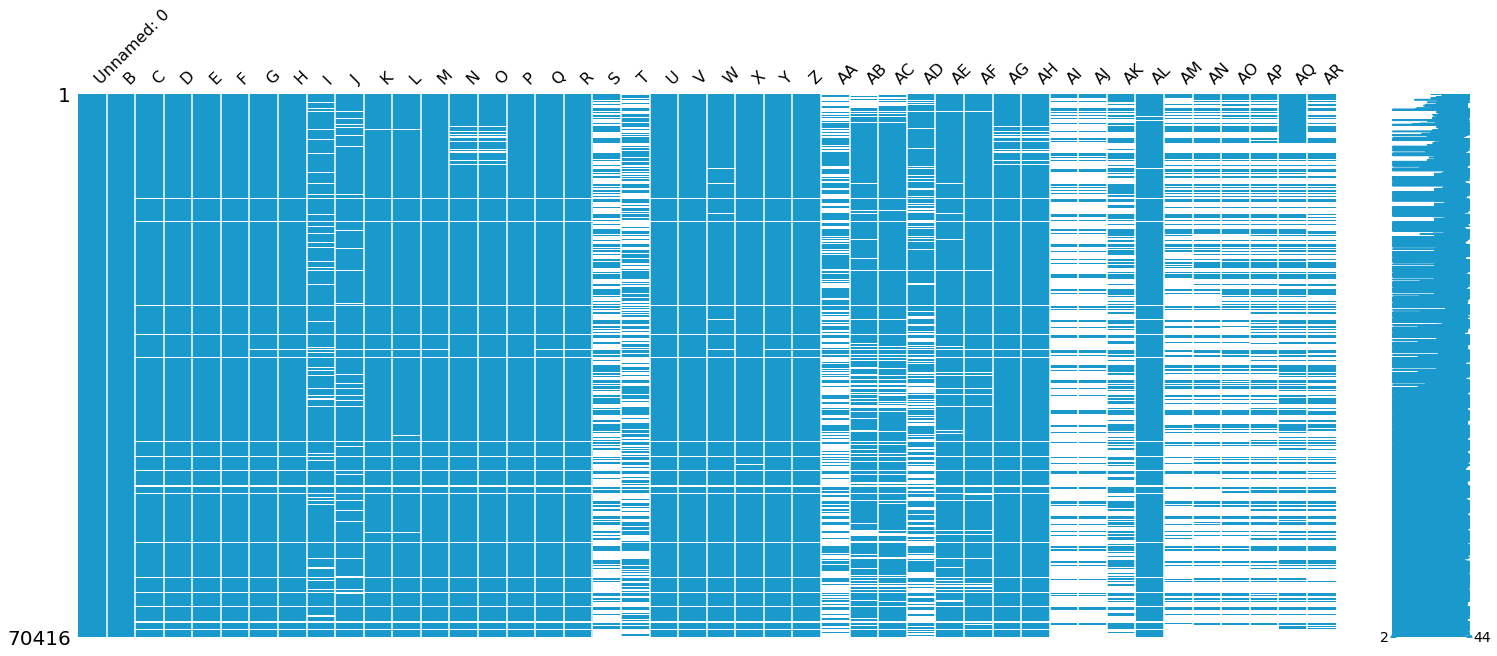

In [9]:
msno.matrix(df=df_copy.iloc[:,0:44], color=(0.1, 0.6, 0.8))

결측값으로 처리된 컬럼들

- I : 1일 등락률(%)

- J : 5일 등락률(%)

- K : 과거 ROE(%)

- L : 과거 ROA(%)

- M : 과거 PCR

- N : 고점 PBR

- O : 저점 PBR

- P : 5년 평균 PBR

- Q : 과거 PER

- R : 발표 PER

- S : 1년후 PER

- T : 시가 배당률(%)

- W : 매출액(억)

- X : 영업이익(억)

- Y : 순이익(지배)

- AA : 당일 기관(%)

- AB : 당일 외인(%)

- AC : 당일 수급(%)

- AD : 주간 기관(%)

- AE : 주간 외인(%)

- AF : 주간 수급(%)

- AG : 고점 대비 PBR 괴리율

- AH : 저점 대비 PBR 괴리율

- AI : 목표가 괴리율 (%)

- AJ : 목표 주가

- AK : 마지막 리포트일

- AL : 실적 발표일
 
- AM : 1주일 어닝스

- AN : 1달 어닝스

- AO : 3개월 어닝스

- AP : 6개월 어닝스

- AQ : 12개월 어닝스

- AR : 어닝스 점수

n기간 어닝스 : 1년후 지배순익 - n기간 전 1년후 지배순익. 최근 1주일내 애널리스트들이 지배주주순이익을 상향조정했거나 지배주주순이익 자체가 올라간 경우 적용.

목표주가, 어닝스 자체가 애널리스트들의 예측

In [10]:
nan_cols = ['I', 'J', 'K', 'L','M','N','O','P','Q','R','S','T','W','X','Y','AA','AB','AC','AD','AE','AF','AG','AH','AI','AJ','AK','AL','AM','AN','AO','AP','AQ','AR']
for i in nan_cols:
    a = int(df_copy[i].isnull().sum() / 69408 * 100)
    print(i,'have',a,'% null data')

I have 11 % null data
J have 7 % null data
K have 3 % null data
L have 3 % null data
M have 2 % null data
N have 4 % null data
O have 4 % null data
P have 2 % null data
Q have 3 % null data
R have 3 % null data
S have 58 % null data
T have 47 % null data
W have 3 % null data
X have 2 % null data
Y have 2 % null data
AA have 49 % null data
AB have 18 % null data
AC have 15 % null data
AD have 28 % null data
AE have 9 % null data
AF have 7 % null data
AG have 5 % null data
AH have 5 % null data
AI have 80 % null data
AJ have 80 % null data
AK have 52 % null data
AL have 2 % null data
AM have 71 % null data
AN have 68 % null data
AO have 66 % null data
AP have 65 % null data
AQ have 53 % null data
AR have 62 % null data


결측 40% 이상인 것 : 

- S : 1년후 PER, 1년후 예상 PER 지표이다. 애널리스트들의 예측을 기반으로 한다. PER와 관련된 Q,R 지표가 있기 때문에 삭제해도 무방함.

- T : 시가 배당률(%), 시가배당금 / 주가. 높을수록 주주들이 선호하며 주가가 안정적으로 갈 가능성이 높음. 이익을 주주와 나누는 것, 버리기 상당히 아까운 지표이다. 결측치 채울 방안을 생각해보자

- AA : 당일 기관(%), 당일 기관 수급 ,기관순매수대금 / 시가총액. 높을수록 기관의 매수세가 강하다고 생각. 이 부분은 실제로 기관 수급이 없었을 수도 있기 때문에 0을 Null로 처리하지 않는게 옳다. 컬럼 사용 가능

-  AI : 목표가 괴리율(%) : (현재가 * 100) / 목표주가. 괴리율리 낮을수록 현재가 < 목표주가를 의미. 너무 많은 Null 데이터를 보유한다. 삭제

-  AJ : 목표주가 : 애널리스트들이 측정한 목표주가의 평균 (가중평균치 사용, 과거 7 당일 3). 너무 많은 Null 데이터를 보유한다. 삭제

-  AK : 마지막 리포트일 : 기업재무관련 지표가 아니다. 삭제. 

- AM, AN, AO, AP, AQ : 어닝스 관련 지표. 어닝스 점수인 AR 컬럼으로 대체하겠다.

- AR : 어닝스 점수, 1주일 어닝스 1%이상 20점, 1개월 어닝스 1% 이상 20점, 3개월 어닝스 3%이상 20점, 6개월 어닝스 6%이상 20점, 9개월 어닝스 9%이상 20점, 12개월 어닝스 12%이상 20점 으로 총 120점 만점. 결측 비중이 너무 큰 관계로 삭제하겠다.


삭제 컬럼 : S, AI, AJ, AK, AL, AM ,AN, AO, AP, AQ, AR

결측 채울 컬럼 : T

결측을 0으로 대체하여 사용 할 컬럼 : AA

In [11]:
df1 = df.drop(['S','AI','AJ','AK','AL','AM','AN','AO','AP','AQ','AR'],axis = 1)

#### T, AR 결측값 채우기

결측 비율이 높다는 점에서 회귀분석 모델을 사용하여 결측을 채우겠다.

사용할 회귀 분석 모델 : KNN, W-KNN, SVM 

- K,L,M,W,AG,AH 가장 이전 값을 통해 결측치 채우기

- I,J,AB,AC,AD,AE,AF는 0이 존재할 수 있기 때문에 그대로 가져감.

- 파산기업을 제외하고 나머지 기업에 대해서만 결측치를 제거

- 이전 데이터값으로 결측치 제거

In [16]:
# K,L,M,W,AG,AH 중앙값을 통해 결측치 채우기
# I,J,AB,AC,AD,AE,AF는 0이 존재할 수 있기 때문에 그대로 가져감.
# 파산기업을 제외하고 나머지 기업에 대해서만 결측치를 제거
# 이전 데이터값으로 결측치 제거

def fill_miss(code):
    bis = []
    bis_index = df1[df1.B == code].index
    for i in bis_index:
        bis.append(df1.loc[i]) #한 기업의 지표들이 리스트 bis안에 모임
    bis = pd.DataFrame(bis)
    bis.K = bis.K.replace(0,np.nan)
    bis.L = bis.L.replace(0,np.nan)
    bis.M = bis.M.replace(0,np.nan)
    bis.W = bis.W.replace(0,np.nan)
    bis.AG = bis.AG.replace(0,np.nan)
    bis.AH = bis.AH.replace(0,np.nan)
    bis.I = bis.I.replace(0,np.nan)
    bis.J = bis.J.replace(0,np.nan)
    bis.AB = bis.AB.replace(0,np.nan)
    bis.AC = bis.AC.replace(0,np.nan)
    bis.AD = bis.AD.replace(0,np.nan)
    bis.AE = bis.AE.replace(0,np.nan)
    bis.AH = bis.AH.replace(0,np.nan)
        
    bis.K = bis.K.fillna(method = 'pad')
    bis.L = bis.L.fillna(method = 'pad')
    bis.M = bis.M.fillna(method = 'pad')
    bis.W = bis.W.fillna(method = 'pad')
    bis.AG = bis.AG.fillna(method = 'pad')
    bis.AH = bis.AH.fillna(method = 'pad')
    bis.I = bis.I.fillna(0)
    bis.J = bis.J.fillna(0)
    bis.AB = bis.AB.fillna(0)
    bis.AC = bis.AC.fillna(0)
    bis.AD = bis.AD.fillna(0)
    bis.AE = bis.AE.fillna(0)
    bis.AH = bis.AH.fillna(0)

    
    return bis

In [19]:
found_1 = fill_miss('A207720')

In [20]:
found_1

,Unnamed: 0,B,C,D,E,F,G,H,I,J,...,Z,AA,AB,AC,AD,AE,AF,AG,AH,Unnamed: 44
1953,1953,A207720,엔에이치SL스팩,금융,스팩,코스닥,2010.0,50.00,0.500000,-1.228501,...,87.0,0.426627,0.000000,0.426627,0.419080,0.000000,0.419080,81.617647,100.000000,NaN
3909,1953,A207720,엔에이치SL스팩,금융,스팩,코스닥,2070.0,52.00,1.970443,2.475248,...,89.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,85.294118,102.654867,NaN
5865,1953,A207720,엔에이치SL스팩,금융,스팩,코스닥,2140.0,53.61,3.880000,3.883495,...,92.0,-0.428278,-0.020705,-0.448983,-0.389853,-0.020705,-0.410558,87.500000,105.309735,NaN
7821,1953,A207720,엔에이치SL스팩,금융,스팩,코스닥,2180.0,54.61,3.560000,0.692841,...,75.0,0.113532,-0.008057,0.105475,0.113532,0.239700,0.353232,88.970588,107.079646,1953.0
9777,1953,A207720,엔에이치SL스팩,금융,스팩,코스닥,2060.0,51.60,-1.200000,-0.722892,...,71.0,0.000000,0.000000,0.000000,0.707752,0.025969,0.733721,82.352941,100.900901,NaN
11733,1953,A207720,엔에이치SL스팩,금융,스팩,코스닥,2050.0,51.35,-0.970000,-2.380952,...,70.0,0.234469,0.001947,0.236417,1.084323,-0.099708,0.984615,83.823529,102.702703,NaN
13689,1953,A207720,엔에이치SL스팩,금융,스팩,코스닥,2055.0,51.48,0.000000,0.000000,...,71.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.823529,102.702703,NaN
15645,1953,A207720,엔에이치SL스팩,금융,스팩,코스닥,2055.0,51.48,0.000000,0.000000,...,71.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.823529,102.702703,NaN
17601,1953,A207720,엔에이치SL스팩,금융,스팩,코스닥,2055.0,51.48,0.740000,0.735294,...,71.0,0.000000,0.000000,0.000000,0.330031,0.000000,0.330031,83.823529,102.702703,NaN
19557,1953,A207720,엔에이치SL스팩,금융,스팩,코스닥,2045.0,51.23,0.000000,0.000000,...,71.0,0.000000,0.000000,0.000000,0.693929,-0.032012,0.661917,83.823529,102.702703,NaN


In [ ]:
#파산기업은 제외

bankrupt = []
bankrupt_index = df[df.C == 0].index
for i in bankrupt_index:
    bankrupt.append(df.loc[i])
    df.drop(i,inplace = True)
bankrupt = pd.DataFrame(bankrupt)

In [86]:
bis = []
bis_index = df1[df1.B == 'A005490'].index

In [87]:
correct_data = df1[df1.index ==1931]

In [88]:
correct_data

,Unnamed: 0,B,C,D,E,F,G,H,I,J,...,Z,AA,AB,AC,AD,AE,AF,AG,AH,Unnamed: 44
1931,1931,A215580,대우스팩3호,금융,스팩,코스닥,1985,107,0.0,0.252525,...,96.0,0.0,0.0,0.0,0.128412,0.0,0.128412,97.169811,100.0,NaN


In [89]:
bis_index

Int64Index([    8,  1964,  3920,  5876,  7832,  9788, 11744, 13700, 15656,
            17612, 19568, 21524, 23480, 25436, 27392, 29348, 31304, 33260,
            35216, 37172, 39128, 41084, 43040, 44996, 46952, 48908, 50864,
            52820, 54776, 56732, 58688, 60644, 62600, 64556, 66512, 68468],
           dtype='int64')

In [21]:
for i in bis_index:
    bis.append(df.loc[i])
bis = pd.DataFrame(bis)

NameError: name 'bis_index' is not defined

In [91]:
bis

,Unnamed: 0,B,C,D,E,F,G,H,I,J,...,AJ,AK,AL,AM,AN,AO,AP,AQ,AR,Unnamed: 44
8,8,A005490,POSCO,철강 및 비철강,제철,코스피,267500,233225.00,0.000000,9.631148,...,332434.378979,2017-01-13 00:00:00,2016.10.26,16.366935,15.561049,13.436952,24.367892,61.1,100.0,NaN
1964,8,A005490,POSCO,철강 및 비철강,제철,코스피,282000,245867.00,-0.176991,5.223881,...,325768.828849,2017-02-13 00:00:00,2017.01.25,6.869432,2.938644,22.521255,19.013188,68.1,100.0,NaN
3920,8,A005490,POSCO,철강 및 비철강,제철,코스피,291500,254149.62,5.050000,1.923077,...,362876.778386,20170316,20170125,-0.402342,-2.708836,15.724553,25.715115,63.6,60.0,NaN
5876,8,A005490,POSCO,철강 및 비철강,제철,코스피,265000,231045.11,-2.930000,-2.930403,...,362876.778386,20170403,20170330,0.121965,16.598969,17.045613,32.860816,91.0,80.0,8.0
7832,8,A005490,POSCO,철강 및 비철강,제철,코스피,273000,238020.06,0.740000,1.675978,...,365436.801679,20170515,20170330,0.426451,9.066850,23.894496,51.741882,53.1,80.0,NaN
9788,8,A005490,POSCO,철강 및 비철강,제철,코스피,271000,236276.32,-0.180000,-2.692998,...,360853.078763,20170616,20170330,-2.598769,-2.447604,21.721522,30.428634,49.4,80.0,NaN
11744,8,A005490,POSCO,철강 및 비철강,제철,코스피,317500,276818.20,0.320000,3.758170,...,367025.968813,20170713,20170330,-0.860750,3.912204,10.694650,29.505531,55.2,100.0,NaN
13700,8,A005490,POSCO,철강 및 비철강,제철,코스피,327500,285536.88,-1.210000,0.000000,...,381786.781288,20170724,20170720,1.804075,2.414243,12.601734,37.166505,41.2,120.0,NaN
15656,8,A005490,POSCO,철강 및 비철강,제철,코스피,306500,267227.65,-3.160000,-1.762821,...,399055.062785,20170921,20170720,-1.959302,-3.576499,8.550620,32.129466,44.9,80.0,NaN
17612,8,A005490,POSCO,철강 및 비철강,제철,코스피,313000,272894.79,-0.790000,-1.261830,...,399798.237671,20171011,20170720,-2.268394,-10.053395,2.706040,31.692616,41.6,60.0,NaN


In [ ]:
bankrupt

In [81]:
set(df1.B)

{'A161890',
 'A154040',
 'A023910',
 'A009810',
 'A215790',
 'A005110',
 'A148250',
 'A032960',
 'A054930',
 'A105740',
 'A035810',
 'A217620',
 'A054300',
 'A060310',
 'A065620',
 'A056080',
 'A011930',
 'A012320',
 'A033160',
 'A020180',
 'A056730',
 'A089030',
 'A060150',
 'A066270',
 'A008260',
 'A112040',
 'A900300',
 'A045100',
 'A091590',
 'A127710',
 'A039830',
 'A225590',
 'A048830',
 'A119500',
 'A225530',
 'A085910',
 'A008420',
 'A138690',
 'A039440',
 'A001510',
 'A048410',
 'A123840',
 'A011390',
 'A037370',
 'A063080',
 'A019440',
 'A053590',
 'A060260',
 'A134780',
 'A160600',
 'A065570',
 'A035720',
 'A007980',
 'A090460',
 'A006110',
 'A011150',
 'A039980',
 'A153460',
 'A029480',
 'A027040',
 'A039420',
 'A078130',
 'A187420',
 'A192820',
 'A013990',
 'A041910',
 'A067900',
 'A024660',
 'A147830',
 'A002270',
 'A232330',
 'A000070',
 'A086830',
 'A037270',
 'A003080',
 'A200470',
 'A004690',
 'A219550',
 'A177830',
 'A033180',
 'A007370',
 'A068870',
 'A004310',
 'A0

In [22]:
tot_bis = []
for i in set(df1.B):
    a = fill_miss(i)
    tot_bis.append(a)

df2 = pd.concat(tot_bis)

In [23]:
df2

,Unnamed: 0,B,C,D,E,F,G,H,I,J,...,Z,AA,AB,AC,AD,AE,AF,AG,AH,Unnamed: 44
1678,1678,A054180,중앙오션,조선,조선기자재,코스닥,1885,412,-2.583979,-3.084833,...,48.0,0.030380,0.000000,0.030380,0.066928,0.040892,0.107820,14.470678,387.755102,NaN
3634,1678,A054180,중앙오션,조선,조선기자재,코스닥,1915,419,-1.288660,-8.591885,...,48.0,0.003861,0.019565,0.023426,0.132092,0.233579,0.365671,14.699162,393.877551,NaN
5590,1678,A054180,중앙오션,조선,조선기자재,코스닥,1750,382.55,2.340000,-6.666667,...,46.0,0.000000,0.052333,0.052333,0.017540,-0.025330,-0.007790,29.329609,636.363636,NaN
7546,1678,A054180,중앙오션,조선,조선기자재,코스닥,1415,309.32,-1.390000,-8.414239,...,37.0,0.000679,0.029355,0.030034,0.062233,0.062880,0.125113,37.149028,521.212121,1678.0
9502,1678,A054180,중앙오션,조선,조선기자재,코스닥,2050,448.13,-7.240000,-1.678657,...,54.0,0.000000,-0.082164,-0.082164,0.000000,-0.091112,-0.091112,54.859611,769.696970,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61439,803,A016880,웅진,IT서비스,시스템서비스,코스피,1325,983,-1.500000,3.100000,...,43.0,-0.020000,-0.020000,-0.040000,-0.010000,0.070000,0.060000,32.000000,144.000000,NaN
63395,803,A016880,웅진,IT서비스,시스템서비스,코스피,1345,998,0.000000,3.500000,...,50.0,0.000000,0.000000,0.000000,0.000000,0.030000,0.030000,37.000000,166.000000,NaN
65351,803,A016880,웅진,IT서비스,시스템서비스,코스피,1750,1298,-0.600000,48.900000,...,65.0,-0.050000,-1.120000,-1.170000,0.000000,-1.260000,-1.260000,48.000000,216.000000,NaN
67307,803,A016880,웅진,IT서비스,시스템서비스,코스피,1510,1120,-2.000000,-7.900000,...,56.0,0.000000,0.000000,0.000000,0.000000,-0.500000,-0.510000,41.000000,184.000000,NaN


In [85]:
tot_bis

[     Unnamed: 0        B     C     D    E    F      G      H        I  \
 137         137  A161890  한국콜마  가정용품  화장품  코스피  66300  13989  3.59375   
 
              J  ...     Z       AA        AB        AC        AD        AE  \
 137  11.428571  ...  62.0  0.14588  0.082905  0.228785  0.290951  0.089009   
 
           AF         AG          AH  Unnamed: 44  
 137  0.37996  51.594747  133.819951          NaN  
 
 [1 rows x 34 columns],
       Unnamed: 0        B     C           D        E    F     G    H  \
 1397        1397  A154040  솔루에타  IT 장비 및 소재  스마트폰 부품  코스닥  6850  755   
 
              I         J  ...     Z   AA   AB   AC   AD      AE      AF  \
 1397 -3.521127 -0.724638  ...  74.0  0.0  0.0  0.0  0.0  0.2699  0.2699   
 
              AG          AH  Unnamed: 44  
 1397  42.735043  107.526882          NaN  
 
 [1 rows x 34 columns],
      Unnamed: 0        B     C         D   E    F      G     H         I  \
 737         737  A023910  대한약품  제약 및 바이오  제약  코스닥  26750  1605 -1.

In [ ]:
df2

In [ ]:
df2.to_csv('bis_data.csv')

In [24]:
df2.to_excel('bis_data.xlsx')

# 기업별 데이터

In [1]:
import pandas as pd
import numpy as np

In [2]:
df2 = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/last_data/bis_data.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/last_data/bis_data.xlsx'

In [63]:
df2

,Unnamed: 0,Unnamed: 0.1,B,C,D,E,F,G,H,I,...,Z,AA,AB,AC,AD,AE,AF,AG,AH,Unnamed: 34
0,1678,1678,A054180,중앙오션,조선,조선기자재,코스닥,1885,412,-2.583979,...,48,0.030380,0.000000,0.030380,0.066928,0.040892,0.107820,14.470678,387.755102,NaN
1,3634,1678,A054180,중앙오션,조선,조선기자재,코스닥,1915,419,-1.288660,...,48,0.003861,0.019565,0.023426,0.132092,0.233579,0.365671,14.699162,393.877551,NaN
2,5590,1678,A054180,중앙오션,조선,조선기자재,코스닥,1750,382.55,2.340000,...,46,0.000000,0.052333,0.052333,0.017540,-0.025330,-0.007790,29.329609,636.363636,NaN
3,7546,1678,A054180,중앙오션,조선,조선기자재,코스닥,1415,309.32,-1.390000,...,37,0.000679,0.029355,0.030034,0.062233,0.062880,0.125113,37.149028,521.212121,1678.0
4,9502,1678,A054180,중앙오션,조선,조선기자재,코스닥,2050,448.13,-7.240000,...,54,0.000000,-0.082164,-0.082164,0.000000,-0.091112,-0.091112,54.859611,769.696970,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70411,61439,803,A016880,웅진,IT서비스,시스템서비스,코스피,1325,983,-1.500000,...,43,-0.020000,-0.020000,-0.040000,-0.010000,0.070000,0.060000,32.000000,144.000000,NaN
70412,63395,803,A016880,웅진,IT서비스,시스템서비스,코스피,1345,998,0.000000,...,50,0.000000,0.000000,0.000000,0.000000,0.030000,0.030000,37.000000,166.000000,NaN
70413,65351,803,A016880,웅진,IT서비스,시스템서비스,코스피,1750,1298,-0.600000,...,65,-0.050000,-1.120000,-1.170000,0.000000,-1.260000,-1.260000,48.000000,216.000000,NaN
70414,67307,803,A016880,웅진,IT서비스,시스템서비스,코스피,1510,1120,-2.000000,...,56,0.000000,0.000000,0.000000,0.000000,-0.500000,-0.510000,41.000000,184.000000,NaN


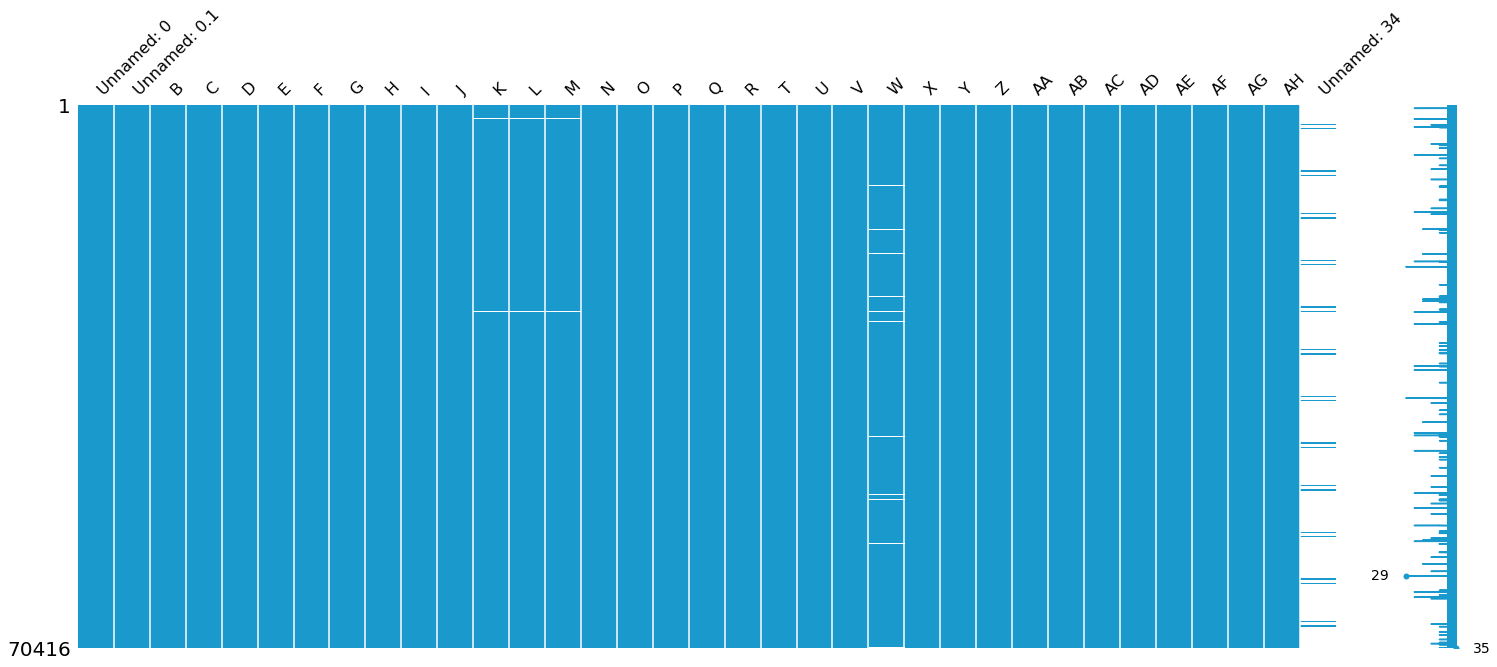

In [64]:
import missingno as msno

msno.matrix(df=df2.iloc[:,0:44], color=(0.1, 0.6, 0.8))

In [66]:
nan_cols = ['B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','T','U','V','W','X','Y','Z','AA','AB','AC','AD','AE','AF','AG','AH']
for i in nan_cols:
    a = float(df2[i].isnull().sum() / 69408 * 100)
    print(i,'have',a,'% null data')

B have 0.0 % null data
C have 0.0 % null data
D have 0.0 % null data
E have 0.0 % null data
F have 0.0 % null data
G have 0.0 % null data
H have 0.0 % null data
I have 0.0 % null data
J have 0.0 % null data
K have 0.19017980636237897 % null data
L have 0.19017980636237897 % null data
M have 0.16856846473029047 % null data
N have 0.0 % null data
O have 0.0 % null data
P have 0.0 % null data
Q have 0.0 % null data
R have 0.0 % null data
T have 0.0 % null data
U have 0.0 % null data
V have 0.0 % null data
W have 1.5127939142461964 % null data
X have 0.0 % null data
Y have 0.0 % null data
Z have 0.0 % null data
AA have 0.012966804979253113 % null data
AB have 0.0 % null data
AC have 0.0 % null data
AD have 0.0 % null data
AE have 0.0 % null data
AF have 0.012966804979253113 % null data
AG have 0.03169663439372983 % null data
AH have 0.0 % null data


In [67]:
# 결측치 전부 채우고, 파산기업은 모든 피쳐를 0으로 설정
# D,E는 데이터셋에서 제거
# F는 시가총액을 통해 채워주기
# G,H,N,O,Q,R,T,U,V,W,X,Y,Z,AA,AF 피쳐들은 이전 데이터로 매꿔주기

def fill_miss(code):
    bis = []
    bis_index = df2[df2.B == code].index
    for i in bis_index:
        bis.append(df2.loc[i]) #한 기업의 지표들이 리스트 bis안에 모임
    
    bis = pd.DataFrame(bis)    
    bis.K = bis.K.fillna(method = 'pad')
    bis.L = bis.L.fillna(method = 'pad')
    bis.M = bis.M.fillna(method = 'pad')
    bis.W = bis.W.fillna(method = 'pad')
    bis.AA = bis.AA.fillna(method = 'pad')
    bis.AF = bis.AF.fillna(method = 'pad')
    bis.AG = bis.AG.fillna(method = 'pad')
    
    return bis

In [68]:
tot_bis = []
for i in set(df2.B):
    a = fill_miss(i)
    tot_bis.append(a)

df3 = pd.concat(tot_bis)

In [ ]:
msno.matrix(df=df3.iloc[:,0:44], color=(0.1, 0.6, 0.8))

In [70]:
def fill_miss_back(code):
    bis = []
    bis_index = df3[df3.B == code].index
    for i in bis_index:
        bis.append(df3.loc[i]) #한 기업의 지표들이 리스트 bis안에 모임
    
    bis = pd.DataFrame(bis)    
    bis.K = bis.K.fillna(method = 'bfill')
    bis.L = bis.L.fillna(method = 'bfill')
    bis.M = bis.M.fillna(method = 'bfill')
    bis.W = bis.W.fillna(method = 'bfill')
    bis.AA = bis.AA.fillna(method = 'bfill')
    bis.AF = bis.AF.fillna(method = 'bfill')
    bis.AG = bis.AG.fillna(method = 'bfill')
    
    return bis

In [76]:
tot_bis = []
for i in set(df3.B):
    a = fill_miss_back(i)
    tot_bis.append(a)

df4 = pd.concat(tot_bis)

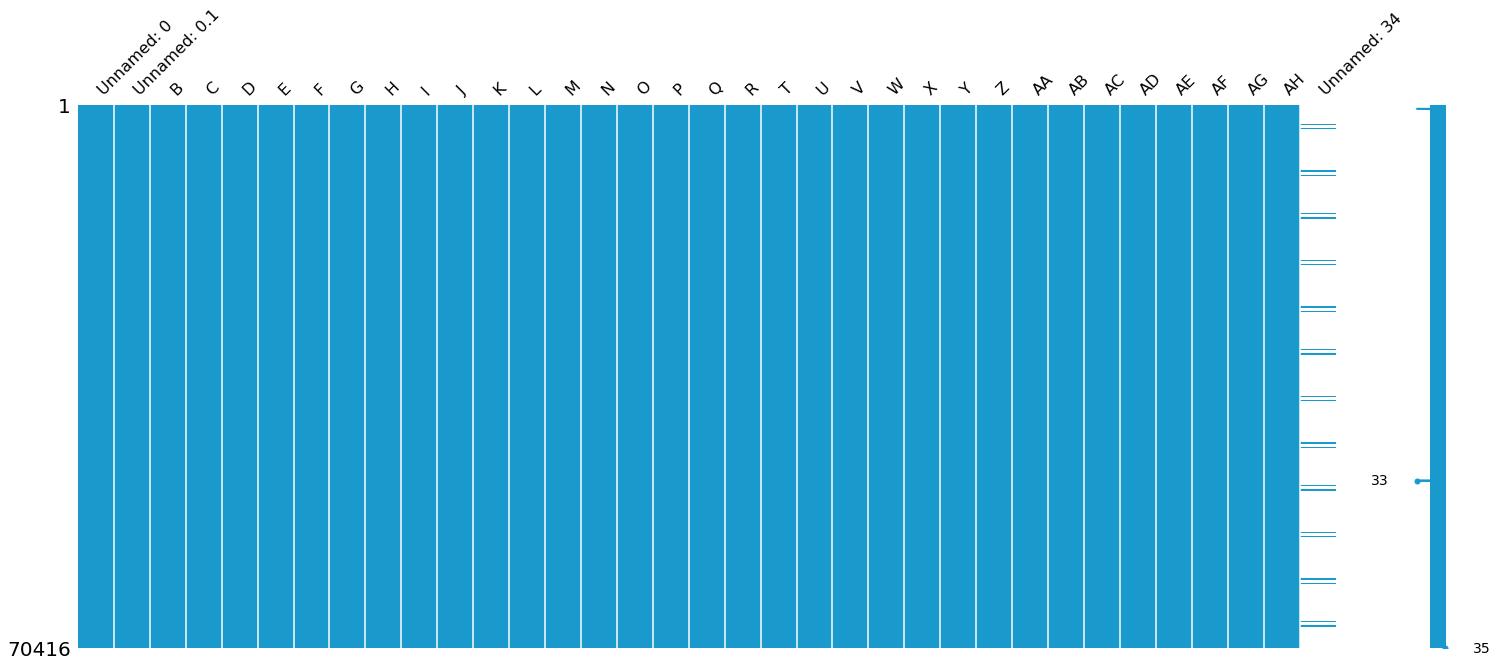

In [77]:
msno.matrix(df=df4.iloc[:,0:44], color=(0.1, 0.6, 0.8))

In [78]:
nan_cols = ['B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','T','U','V','W','X','Y','Z','AA','AB','AC','AD','AE','AF','AG','AH']
for i in nan_cols:
    a = float(df4[i].isnull().sum() / 69408 * 100)
    print(i,'have',a,'% null data')

B have 0.0 % null data
C have 0.0 % null data
D have 0.0 % null data
E have 0.0 % null data
F have 0.0 % null data
G have 0.0 % null data
H have 0.0 % null data
I have 0.0 % null data
J have 0.0 % null data
K have 0.0 % null data
L have 0.0 % null data
M have 0.0 % null data
N have 0.0 % null data
O have 0.0 % null data
P have 0.0 % null data
Q have 0.0 % null data
R have 0.0 % null data
T have 0.0 % null data
U have 0.0 % null data
V have 0.0 % null data
W have 0.1037344398340249 % null data
X have 0.0 % null data
Y have 0.0 % null data
Z have 0.0 % null data
AA have 0.0 % null data
AB have 0.0 % null data
AC have 0.0 % null data
AD have 0.0 % null data
AE have 0.0 % null data
AF have 0.0 % null data
AG have 0.0 % null data
AH have 0.0 % null data


In [79]:
df4.to_excel('final_bis_data.xlsx')

W의 0.1% 결측값은 해당기업의 데이터가 전무하여 채울 수 없었다. 

동일 업종 비슷한 시가총액을 가진 기업의 W 데이터로 값을 채웠다.

In [80]:
data = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/last_data/final_bis_data.xlsx')

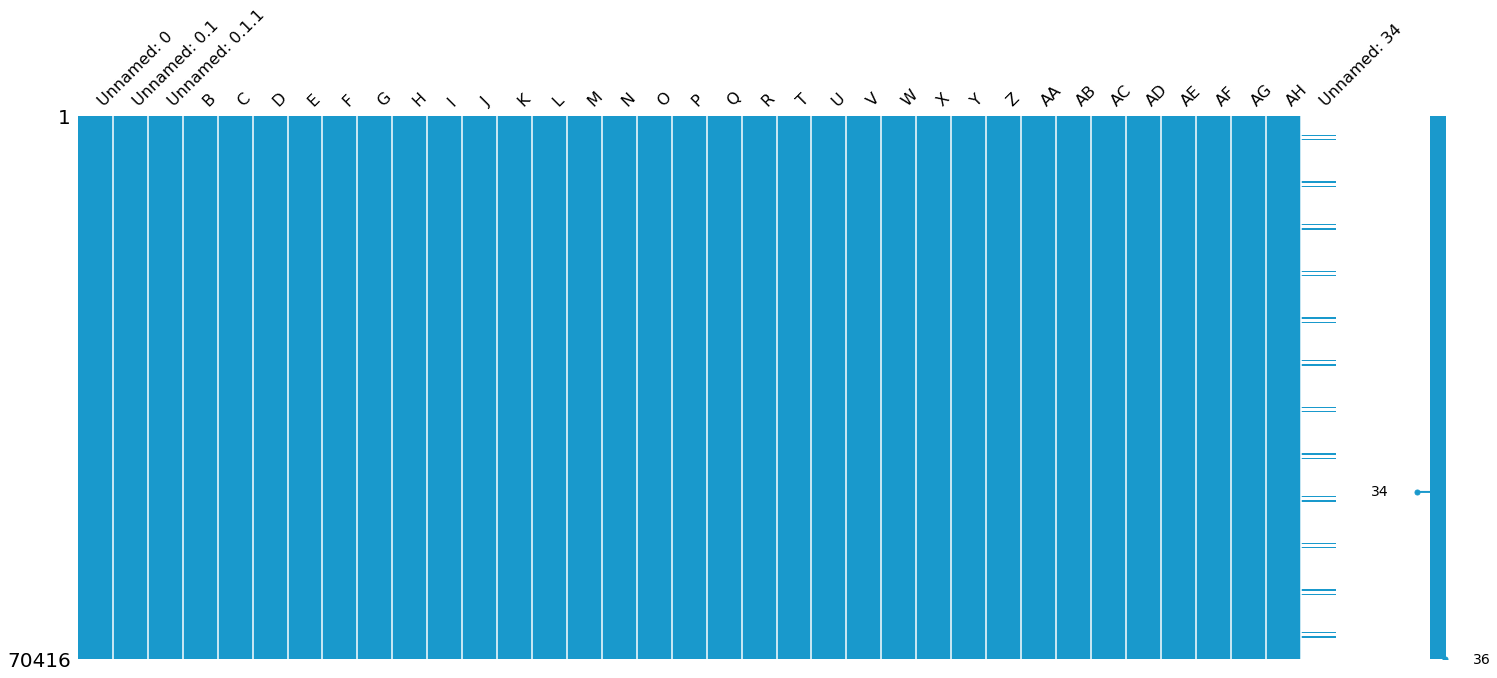

In [82]:
msno.matrix(df=data.iloc[:,0:44], color=(0.1, 0.6, 0.8))

In [83]:
nan_cols = ['B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','T','U','V','W','X','Y','Z','AA','AB','AC','AD','AE','AF','AG','AH']
for i in nan_cols:
    a = float(data[i].isnull().sum() / 69408 * 100)
    print(i,'have',a,'% null data')

B have 0.0 % null data
C have 0.0 % null data
D have 0.0 % null data
E have 0.0 % null data
F have 0.0 % null data
G have 0.0 % null data
H have 0.0 % null data
I have 0.0 % null data
J have 0.0 % null data
K have 0.0 % null data
L have 0.0 % null data
M have 0.0 % null data
N have 0.0 % null data
O have 0.0 % null data
P have 0.0 % null data
Q have 0.0 % null data
R have 0.0 % null data
T have 0.0 % null data
U have 0.0 % null data
V have 0.0 % null data
W have 0.0014407561088059012 % null data
X have 0.0 % null data
Y have 0.0 % null data
Z have 0.0 % null data
AA have 0.0 % null data
AB have 0.0 % null data
AC have 0.0 % null data
AD have 0.0 % null data
AE have 0.0 % null data
AF have 0.0 % null data
AG have 0.0 % null data
AH have 0.0 % null data


In [85]:
# ???

data.W.isnull().sum() 

1

# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
data = pd.read_excel('C:/Users/jlee0/Desktop/KYU/hanim ict/1/data/last_data/final_bis_data.xlsx')

test_set : 2019.06 ~ 2019.12, 총 6개월

train_set : 2017.01 ~ 2019.05, 총 29개월

In [103]:
test_set = pd.DataFrame(data.loc[(data['2019_06'] > 0) | (data['2019_07'] > 0) | (data['2019_08'] > 0) | (data['2019_09'] > 0) | (data['2019_10'] > 0) | (data['2019_11'] > 0) | (data['2019_12'] > 0 )])
train_set = pd.DataFrame(data.loc[(data['2017_01'] > 0) | (data['2017_02'] > 0) | (data['2017_03'] > 0) | (data['2017_04'] > 0) | (data['2017_05'] > 0) | (data['2017_06'] > 0) | (data['2017_07'] > 0 )| (data['2017_08'] > 0 )| (data['2017_09'] > 0 )| (data['2017_10'] > 0 )| (data['2017_11'] > 0 )| (data['2017_12'] > 0 ) | (data['2018_01'] > 0) | (data['2018_02'] > 0) | (data['2018_03'] > 0) | (data['2018_04'] > 0) | (data['2018_05'] > 0) | (data['2018_06'] > 0) | (data['2018_07'] > 0 )| (data['2018_08'] > 0 )| (data['2018_09'] > 0 )| (data['2018_10'] > 0 )| (data['2018_11'] > 0 )| (data['2018_12'] > 0 ) | (data['2019_01'] > 0) | (data['2019_02'] > 0) | (data['2019_03'] > 0) | (data['2019_04'] > 0) | (data['2019_05'] > 0)])

In [104]:
train_set

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,B,C,D,E,F,G,H,...,2019_04,2019_05,2019_06,2019_07,2019_08,2019_09,2019_10,2019_11,2019_12,ER
0,34992,1453,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,5130,746,...,0,0,0,0,0,0,0,0,0,0.000000
1,34993,3409,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,5160,751,...,0,0,0,0,0,0,0,0,0,0.584795
2,34994,5365,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,5890,856.81,...,0,0,0,0,0,0,0,0,0,14.147287
3,34995,7321,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,5690,827.71,...,0,0,0,0,0,0,0,0,0,-3.395586
4,34996,9277,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,5150,749.16,...,0,0,0,0,0,0,0,0,0,-9.490334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70404,23568,47817,873,A043610,지니뮤직,미디어 및 엔터,미디어,코스닥,5270,3063,...,0,0,0,0,0,0,0,0,0,10.366492
70405,23569,49773,873,A043610,지니뮤직,미디어 및 엔터,미디어,코스닥,5210,3028,...,0,0,0,0,0,0,0,0,0,-1.138520
70406,23570,51729,873,A043610,지니뮤직,미디어 및 엔터,미디어,코스닥,4730,2749,...,0,0,0,0,0,0,0,0,0,-9.213052
70407,23571,53685,873,A043610,지니뮤직,미디어 및 엔터,미디어,코스닥,4845,2816,...,1,0,0,0,0,0,0,0,0,2.431290


In [105]:
test_set

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,B,C,D,E,F,G,H,...,2019_04,2019_05,2019_06,2019_07,2019_08,2019_09,2019_10,2019_11,2019_12,ER
29,35021,58177,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,3880,1209,...,0,0,1,0,0,0,0,0,0,-18.997912
30,35022,60133,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,4690,1462,...,0,0,0,1,0,0,0,0,0,20.876289
31,35023,62089,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,5570,1747,...,0,0,0,0,1,0,0,0,0,18.763326
32,35024,64045,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,5320,1712,...,0,0,0,0,0,1,0,0,0,-4.488330
33,35025,66001,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,5490,1815,...,0,0,0,0,0,0,1,0,0,3.195489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70411,23575,61509,873,A043610,지니뮤직,미디어 및 엔터,미디어,코스닥,3465,2014,...,0,0,0,0,1,0,0,0,0,-14.019851
70412,23576,63465,873,A043610,지니뮤직,미디어 및 엔터,미디어,코스닥,3650,2121,...,0,0,0,0,0,1,0,0,0,5.339105
70413,23577,65421,873,A043610,지니뮤직,미디어 및 엔터,미디어,코스닥,3810,2214,...,0,0,0,0,0,0,1,0,0,4.383562
70414,23578,67377,873,A043610,지니뮤직,미디어 및 엔터,미디어,코스닥,3915,2275,...,0,0,0,0,0,0,0,1,0,2.755906


In [106]:
train_X  = train_set.drop('G',axis = 1)
train_Y = train_set['G']

test_X = test_set.drop('G',axis = 1)
test_Y = test_set['G']

데이터 값 종류 

- 연속 데이터 (단위 : 원, 억)

- 퍼센티지 

- 이진 데이터 (코스피, 코스닥)

연속 데이터 종류 : G, H, U, V, W, X, Y
    
퍼센티지 데이터 종류 : I, J, K, M, O, P, Q, R, T, Z, AA, AB, AC, AD, AE, AF, AG, AH

이진 데이터 종류 : F

In [107]:
train_X

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,B,C,D,E,F,H,I,...,2019_04,2019_05,2019_06,2019_07,2019_08,2019_09,2019_10,2019_11,2019_12,ER
0,34992,1453,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,746,-3.752345,...,0,0,0,0,0,0,0,0,0,0.000000
1,34993,3409,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,751,3.200000,...,0,0,0,0,0,0,0,0,0,0.584795
2,34994,5365,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,856.81,6.130000,...,0,0,0,0,0,0,0,0,0,14.147287
3,34995,7321,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,827.71,0.350000,...,0,0,0,0,0,0,0,0,0,-3.395586
4,34996,9277,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,749.16,-7.710000,...,0,0,0,0,0,0,0,0,0,-9.490334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70404,23568,47817,873,A043610,지니뮤직,미디어 및 엔터,미디어,코스닥,3063,1.700000,...,0,0,0,0,0,0,0,0,0,10.366492
70405,23569,49773,873,A043610,지니뮤직,미디어 및 엔터,미디어,코스닥,3028,3.400000,...,0,0,0,0,0,0,0,0,0,-1.138520
70406,23570,51729,873,A043610,지니뮤직,미디어 및 엔터,미디어,코스닥,2749,-1.500000,...,0,0,0,0,0,0,0,0,0,-9.213052
70407,23571,53685,873,A043610,지니뮤직,미디어 및 엔터,미디어,코스닥,2816,3.200000,...,1,0,0,0,0,0,0,0,0,2.431290


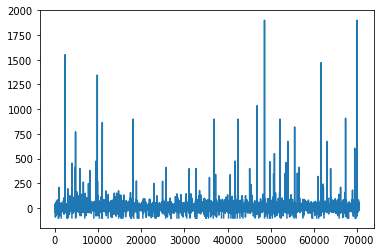

In [8]:
train_X['ER'].plot()

### 이상치 제거

수익률 지표인 ER을 바탕으로 이상치를 제거한다.

In [9]:
def outlier_indices(df,feature):
    Q1 = df[feature].quantile(.25)
    Q3 = df[feature].quantile(.75)
    IQR = Q3 - Q1
    Q2 = df[feature].quantile(.5)
    Q4 = df[feature].quantile(1)
    outlier_step = IQR * 1.5
    outlier_indices = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
    
    return outlier_indices

In [64]:
outlier_indices(train_X,'I')

Int64Index([    2,     4,    13,    24,    53,    59,    73,   151,   158,
              171,
            ...
            70371, 70384, 70385, 70387, 70388, 70390, 70391, 70395, 70397,
            70402],
           dtype='int64', length=4498)

In [18]:
Q1 = train_X.I.quantile(.25)
Q3 = train_X.I.quantile(.75)
IQR = Q3 - Q1
Q2 = train_X.I.quantile(.5)
Q4 = train_X.I.quantile(1)

In [23]:
outlier_step = IQR * 1.5
outlier_indices = train_X[(train_X.I < Q1 - outlier_step) | (train_X.I > Q3 + outlier_step)].index

Int64Index([    2,     4,    13,    24,    53,    59,    73,   151,   158,
              171,
            ...
            70371, 70384, 70385, 70387, 70388, 70390, 70391, 70395, 70397,
            70402],
           dtype='int64', length=4498)

In [26]:
train_X1 = train_X.drop(outlier_indices)
train_X1

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,B,C,D,E,F,H,I,...,2019_04,2019_05,2019_06,2019_07,2019_08,2019_09,2019_10,2019_11,2019_12,ER
0,34992,1453,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,746,-3.752345,...,0,0,0,0,0,0,0,0,0,0.000000
1,34993,3409,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,751,3.200000,...,0,0,0,0,0,0,0,0,0,0.584795
3,34995,7321,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,827.71,0.350000,...,0,0,0,0,0,0,0,0,0,-3.395586
5,34997,11233,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,814.62,-2.270000,...,0,0,0,0,0,0,0,0,0,8.737864
6,34998,13189,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,1105.56,-4.160000,...,0,0,0,0,0,0,0,0,0,35.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70404,23568,47817,873,A043610,지니뮤직,미디어 및 엔터,미디어,코스닥,3063,1.700000,...,0,0,0,0,0,0,0,0,0,10.366492
70405,23569,49773,873,A043610,지니뮤직,미디어 및 엔터,미디어,코스닥,3028,3.400000,...,0,0,0,0,0,0,0,0,0,-1.138520
70406,23570,51729,873,A043610,지니뮤직,미디어 및 엔터,미디어,코스닥,2749,-1.500000,...,0,0,0,0,0,0,0,0,0,-9.213052
70407,23571,53685,873,A043610,지니뮤직,미디어 및 엔터,미디어,코스닥,2816,3.200000,...,1,0,0,0,0,0,0,0,0,2.431290


In [108]:
import seaborn as sns

sns.set_style('darkgrid')

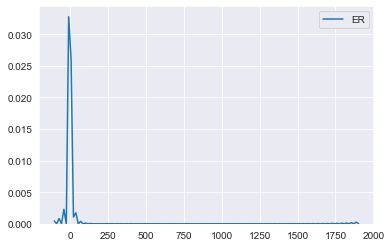

In [33]:
sns.kdeplot(train_X.ER)

In [126]:
Q1 = train_X.ER.quantile(.25)
Q3 = train_X.ER.quantile(.75)
IQR = Q3 - Q1
Q2 = train_X.ER.quantile(.5)
Q4 = train_X.ER.quantile(1)

print("Q1 =",Q1)
print("Q3 =",Q3)
print("IQR =",IQR)
print("Q2 =",Q2)
print("Q4 =",Q4)

Q1 = -6.280193236714976
Q3 = 4.68060818031672
IQR = 10.960801417031696
Q2 = -0.35252643948296125
Q4 = 1900.0


In [127]:
train_X.ER.describe()

count    55627.000000
mean         0.550620
std         26.344205
min       -100.000000
25%         -6.280193
50%         -0.352526
75%          4.680608
max       1900.000000
Name: ER, dtype: float64

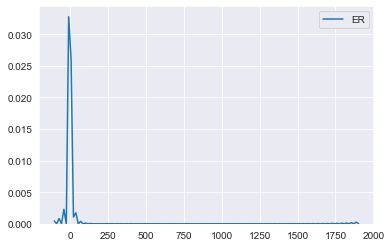

In [44]:
sns.kdeplot(data_copy.ER)

### 클래스 분류

수익률 지표 ER을 바탕으로 5개의 클래스를 생성한다.

q1,2,3,4,5를 16%씩 부여해 이를 기준으로 바운더리 생성

In [11]:
Q1 = train_X.ER.quantile(.16)
Q3 = train_X.ER.quantile(.32)
Q2 = train_X.ER.quantile(.48)
Q4 = train_X.ER.quantile(.60)
Q5 = train_X.ER.quantile(.76)

print("Q1 =",Q1)
print("Q3 =",Q3)
print("Q2 =",Q2)
print("Q4 =",Q4)
print("Q5 =",Q5)

Q1 = -9.642699724517907
Q3 = -4.3478260869565215
Q2 = -0.7423538272194569
Q4 = 0.6988125312732625
Q5 = 5.0


In [12]:
train_indices = train_X.index

In [13]:
train_X['class'] = 3

In [14]:
train_X['class'] 

0        3
1        3
2        3
3        3
4        3
        ..
70404    3
70405    3
70406    3
70407    3
70408    3
Name: class, Length: 56724, dtype: int64

In [15]:
for i in train_indices:
    if train_X["ER"][i] < -9.65:
        train_X['class'][i] = 0 
    elif (train_X["ER"][i] >= -9.65) and (train_X["ER"][i] < -4.3) :
        train_X['class'][i] = 1  
    elif (train_X["ER"][i] >= -4.3) and (train_X["ER"][i] < -0.74) :
        train_X['class'][i] = 2 
    elif (train_X["ER"][i] >= -0.74) and (train_X["ER"][i] < 0.7) :
        train_X['class'][i] = 3  
    elif (train_X["ER"][i] >= 0.7) :
        train_X['class'][i] = 4  

C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:

In [16]:
train_X

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,B,C,D,E,F,H,I,...,2019_05,2019_06,2019_07,2019_08,2019_09,2019_10,2019_11,2019_12,ER,class
0,34992,1453,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,746,-3.752345,...,0,0,0,0,0,0,0,0,0.000000,3
1,34993,3409,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,751,3.200000,...,0,0,0,0,0,0,0,0,0.584795,3
2,34994,5365,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,856.81,6.130000,...,0,0,0,0,0,0,0,0,14.147287,4
3,34995,7321,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,827.71,0.350000,...,0,0,0,0,0,0,0,0,-3.395586,2
4,34996,9277,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,749.16,-7.710000,...,0,0,0,0,0,0,0,0,-9.490334,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70404,23568,47817,873,A043610,지니뮤직,미디어 및 엔터,미디어,코스닥,3063,1.700000,...,0,0,0,0,0,0,0,0,10.366492,4
70405,23569,49773,873,A043610,지니뮤직,미디어 및 엔터,미디어,코스닥,3028,3.400000,...,0,0,0,0,0,0,0,0,-1.138520,2
70406,23570,51729,873,A043610,지니뮤직,미디어 및 엔터,미디어,코스닥,2749,-1.500000,...,0,0,0,0,0,0,0,0,-9.213052,1
70407,23571,53685,873,A043610,지니뮤직,미디어 및 엔터,미디어,코스닥,2816,3.200000,...,0,0,0,0,0,0,0,0,2.431290,4


In [17]:
train_X1 = train_X

In [18]:
train_X1['index_1']=train_X1.index

In [19]:
columns = train_X1.columns.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'B', 'C', 'D', 'E', 'F',
       '2017_01', '2017_02', '2017_03', '2017_04', '2017_05', '2017_06',
       '2017_07', '2017_08', '2017_09', '2017_10', '2017_11', '2017_12',
       '2018_01', '2018_02', '2018_03', '2018_04', '2018_05', '2018_06',
       '2018_07', '2018_08', '2018_09', '2018_10', '2018_11', '2018_12',
       '2019_01', '2019_02', '2019_03', '2019_04', '2019_05', '2019_06',
       '2019_07', '2019_08', '2019_09', '2019_10', '2019_11', '2019_12', 'ER',
       'class', 'index_1'])

In [20]:
columns

Index(['H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'T', 'U', 'V',
       'W', 'X', 'Y', 'Z', 'AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH'],
      dtype='object')

C:\Users\jlee0\AppData\Roaming\Python\Python37\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


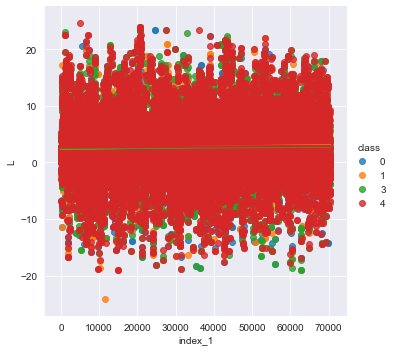

In [110]:

sns.lmplot(x = 'index_1',y = "", data=train_X1, hue = 'class')
plt.show()

In [ ]:
Q1 = df['H'].quantile(.25)
Q3 = df['H'].quantile(.75)
IQR = Q3 - Q1
Q2 = df[feature].quantile(.5)
Q4 = df[feature].quantile(1)
outlier_step = IQR * 1.5
outlier_indices = train_X[(train_X[feature] < Q1 - outlier_step) | (train_X[feature] > Q3 + outlier_step)].index

In [109]:
train_X['K'].dtypes

dtype('float64')

In [101]:
def outlier_indices(df,feature):
    Q1 = df[feature].quantile(.25)
    Q3 = df[feature].quantile(.75)
    IQR = Q3 - Q1
    Q2 = df[feature].quantile(.5)
    Q4 = df[feature].quantile(1)
    outlier_step = IQR * 1.5
    outlier_indices = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
    
    return outlier_indice

outlier_indice = outlier_indices(train_X,'J')
train_X1 = train_X.drop(outlier_indice)

train_indices = train_X1.index

train_X1['class'] = 3

for i in train_indices:
    if train_X1["ER"][i] < -9.65:
        train_X1['class'][i] = 0 
    elif (train_X1["ER"][i] >= -9.65) and (train_X1["ER"][i] < -4.3) :
        train_X1['class'][i] = 1  
    elif (train_X1["ER"][i] >= -4.3) and (train_X1["ER"][i] < -0.74) :
        train_X['class'][i] = 2 
    elif (train_X1["ER"][i] >= -0.74) and (train_X1["ER"][i] < 0.7) :
        train_X1['class'][i] = 3  
    elif (train_X1["ER"][i] >= 0.7) :
        train_X1['class'][i] = 4  
        

train_X1['index_1']=train_X1.index

train_X1

C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A valu

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,B,C,D,E,F,H,I,...,2019_06,2019_07,2019_08,2019_09,2019_10,2019_11,2019_12,ER,class,index_1
0,34992,1453,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,746,-3.752345,...,0,0,0,0,0,0,0,0.000000,3,0
1,34993,3409,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,751,3.200000,...,0,0,0,0,0,0,0,0.584795,3,1
2,34994,5365,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,856.81,6.130000,...,0,0,0,0,0,0,0,14.147287,4,2
4,34996,9277,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,749.16,-7.710000,...,0,0,0,0,0,0,0,-9.490334,1,4
5,34997,11233,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,814.62,-2.270000,...,0,0,0,0,0,0,0,8.737864,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70404,23568,47817,873,A043610,지니뮤직,미디어 및 엔터,미디어,코스닥,3063,1.700000,...,0,0,0,0,0,0,0,10.366492,4,70404
70405,23569,49773,873,A043610,지니뮤직,미디어 및 엔터,미디어,코스닥,3028,3.400000,...,0,0,0,0,0,0,0,-1.138520,3,70405
70406,23570,51729,873,A043610,지니뮤직,미디어 및 엔터,미디어,코스닥,2749,-1.500000,...,0,0,0,0,0,0,0,-9.213052,1,70406
70407,23571,53685,873,A043610,지니뮤직,미디어 및 엔터,미디어,코스닥,2816,3.200000,...,0,0,0,0,0,0,0,2.431290,4,70407


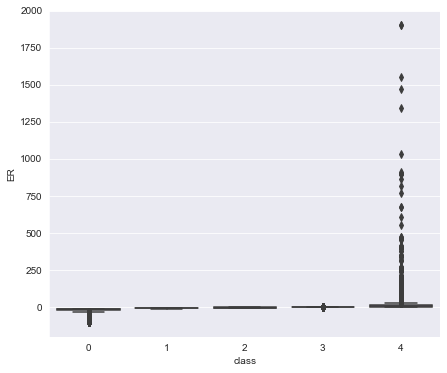

In [27]:
plt.figure(figsize = (7,6))
sns.boxplot(x = 'class', y = 'ER', data = train_X)
plt.show()

In [28]:
outliers = outlier_indices(train_X1,'ER')
train_X1 = train_X1.drop(outliers,axis = 0)

In [29]:
train_X1

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,B,C,D,E,F,H,I,...,2019_06,2019_07,2019_08,2019_09,2019_10,2019_11,2019_12,ER,class,index_1
0,34992,1453,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,746,-3.752345,...,0,0,0,0,0,0,0,0.000000,3,0
1,34993,3409,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,751,3.200000,...,0,0,0,0,0,0,0,0.584795,3,1
2,34994,5365,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,856.81,6.130000,...,0,0,0,0,0,0,0,14.147287,4,2
3,34995,7321,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,827.71,0.350000,...,0,0,0,0,0,0,0,-3.395586,2,3
4,34996,9277,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,749.16,-7.710000,...,0,0,0,0,0,0,0,-9.490334,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70404,23568,47817,873,A043610,지니뮤직,미디어 및 엔터,미디어,코스닥,3063,1.700000,...,0,0,0,0,0,0,0,10.366492,4,70404
70405,23569,49773,873,A043610,지니뮤직,미디어 및 엔터,미디어,코스닥,3028,3.400000,...,0,0,0,0,0,0,0,-1.138520,2,70405
70406,23570,51729,873,A043610,지니뮤직,미디어 및 엔터,미디어,코스닥,2749,-1.500000,...,0,0,0,0,0,0,0,-9.213052,1,70406
70407,23571,53685,873,A043610,지니뮤직,미디어 및 엔터,미디어,코스닥,2816,3.200000,...,0,0,0,0,0,0,0,2.431290,4,70407


C:\Users\jlee0\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jlee0\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jlee0\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45797 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jlee0\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jlee0\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jlee0\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49828 missing from cur

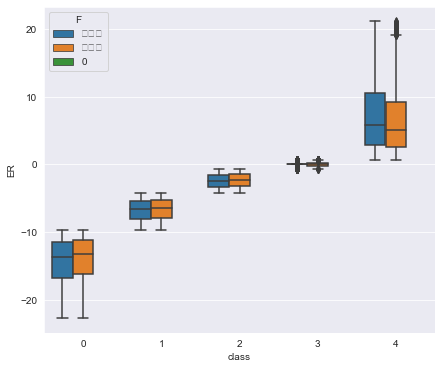

In [31]:
plt.figure(figsize = (7,6))
sns.boxplot(x = 'class', y = 'ER',hue = 'F',data = train_X1)
plt.show()

코스피와 코스닥의 수익률은 모든 클레스에서 유의미한 차이를 보이지 않는다

In [117]:
train_X1['class']

0        3
1        3
2        3
3        3
4        3
        ..
70404    3
70405    3
70406    3
70407    3
70408    3
Name: class, Length: 52474, dtype: int64

In [142]:
for i in train_indices:
    if train_X1[train_X1.index == i]["ER"].item() < -10:
        train_X1[train_X1.index == i]['class'] = 0

C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


KeyboardInterrupt: 

In [146]:
train_indices = train_X.index

train_X['class'] = 3

for i in train_indices:
    if train_X["ER"][i] < -10:
        train_X['class'][i] = 0 
    elif (train_X["ER"][i] >= -10) and (train_X["ER"][i] < -3) :
        train_X['class'][i] = 1  
    elif (train_X["ER"][i] >= -3) and (train_X["ER"][i] < 3) :
        train_X['class'][i] = 2 
    elif (train_X["ER"][i] >= 3) and (train_X["ER"][i] < 10) :
        train_X['class'][i] = 3  
    elif (train_X["ER"][i] >= 10) :
        train_X['class'][i] = 4  


C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

In [148]:
def outlier_indices(df,feature):
    Q1 = df[feature].quantile(.25)
    Q3 = df[feature].quantile(.75)
    IQR = Q3 - Q1
    Q2 = df[feature].quantile(.5)
    Q4 = df[feature].quantile(1)
    outlier_step = IQR * 1.5
    outlier_indices = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
    
    return outlier_indices

def delete_outlier(feature):
    train_X1 = train_X.drop(indices,axis = 0)
    train_indices = train_X1.index
        
    train_X1['index_1']=train_X1.index

    outliers = outlier_indices(train_X1,feature)
    train_X1 = train_X1.drop(outliers,axis = 0)
    
    return train_X1

In [49]:
train_X1 = delete_outlier('J')

C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A valu

In [50]:
train_X1

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,B,C,D,E,F,H,I,...,2019_06,2019_07,2019_08,2019_09,2019_10,2019_11,2019_12,ER,class,index_1
0,34992,1453,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,746,-3.752345,...,0,0,0,0,0,0,0,0.000000,3,0
1,34993,3409,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,751,3.200000,...,0,0,0,0,0,0,0,0.584795,3,1
2,34994,5365,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,856.81,6.130000,...,0,0,0,0,0,0,0,14.147287,4,2
3,34995,7321,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,827.71,0.350000,...,0,0,0,0,0,0,0,-3.395586,2,3
4,34996,9277,1453,A123040,엠에스오토텍,자동차 및 관련부품,차체부품,코스닥,749.16,-7.710000,...,0,0,0,0,0,0,0,-9.490334,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70404,23568,47817,873,A043610,지니뮤직,미디어 및 엔터,미디어,코스닥,3063,1.700000,...,0,0,0,0,0,0,0,10.366492,4,70404
70405,23569,49773,873,A043610,지니뮤직,미디어 및 엔터,미디어,코스닥,3028,3.400000,...,0,0,0,0,0,0,0,-1.138520,2,70405
70406,23570,51729,873,A043610,지니뮤직,미디어 및 엔터,미디어,코스닥,2749,-1.500000,...,0,0,0,0,0,0,0,-9.213052,1,70406
70407,23571,53685,873,A043610,지니뮤직,미디어 및 엔터,미디어,코스닥,2816,3.200000,...,0,0,0,0,0,0,0,2.431290,4,70407


### H (시가총액)

데이터 타입이 OBJECT이므로 FLOAT 형태로 바꿔 EDA를 진행해야한다

### I (1일 등락률)

In [51]:
# I 값에 대한 이상치를 제거
train_X1 = delete_outlier('I')

C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A valu

C:\Users\jlee0\AppData\Roaming\Python\Python37\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


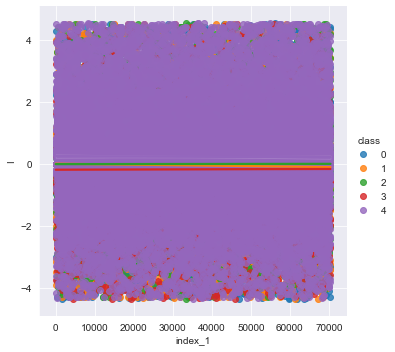

In [52]:
# ER을 통해 나눈 CLASS에 대해서 분포도를 그려봄

sns.lmplot(x = 'index_1',y = 'I', data=train_X1, hue = 'class')
plt.show()

1일 등락률은 너무 지엽적인 정보일 수 있다. 유의미한 결과를 얻기 힘듬

### J (5일 등락률)

In [53]:
# J 값에 대한 이상치를 제거
train_X1 = delete_outlier('J')

C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jlee0\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A valu

C:\Users\jlee0\AppData\Roaming\Python\Python37\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


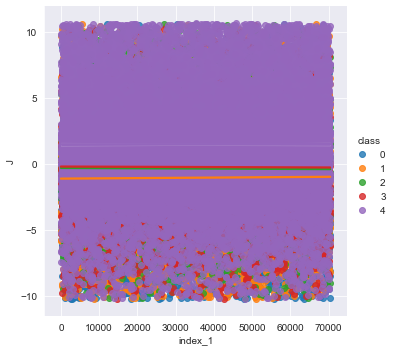

In [55]:
# ER을 통해 나눈 CLASS에 대해서 분포도를 그려봄

sns.lmplot(x = 'index_1',y = 'J', data=train_X1, hue = 'class')
plt.show()

1일 등락률과 별다른 차이를 확인하지 못했다. 이 지표 역시 매우 지엽적인 지표이므로 1달 수익률을 예측하는데에는 효과적이지 않다.

### K (과거 ROE (%))

roe는 순이익 / 자기자본으로 높을수록 좋다.

퀀트에서 매우 유의미한 지표이기 때문에 면밀한 조사가 필요할듯 하다.

In [170]:
# K 값에 대한 이상치를 제거
train_X1 = delete_outlier('K')

C:\Users\jlee0\AppData\Roaming\Python\Python37\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


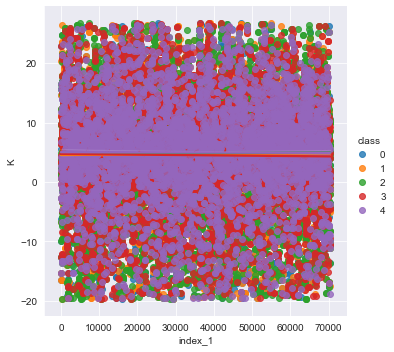

In [171]:
# ER을 통해 나눈 CLASS에 대해서 분포도를 그려봄

sns.lmplot(x = 'index_1',y = 'K', data=train_X1, hue = 'class')
plt.show()

C:\Users\jlee0\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


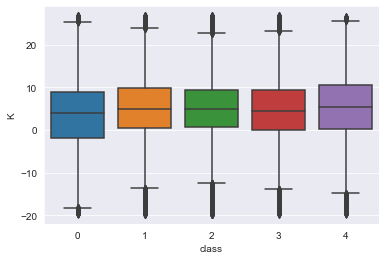

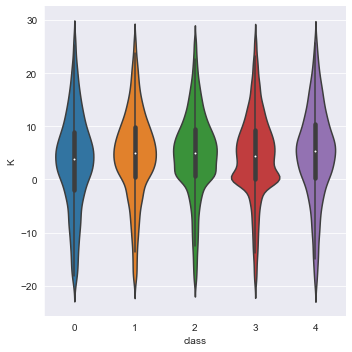

In [172]:
sns.boxplot(x = 'class', y = 'K', data = train_X1)
g = sns.factorplot(x = "class", y = "K", data =train_X1, kind = "violin")

ROE는 퀀트에서 상당히 중요한 지표이다. 제대로 확인이 필요하다.

boxplot을 통해 class별로 K 지표 값이 큰 차이를 보이지 않았다는 것을 알 수 있다,

C:\Users\jlee0\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\jlee0\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


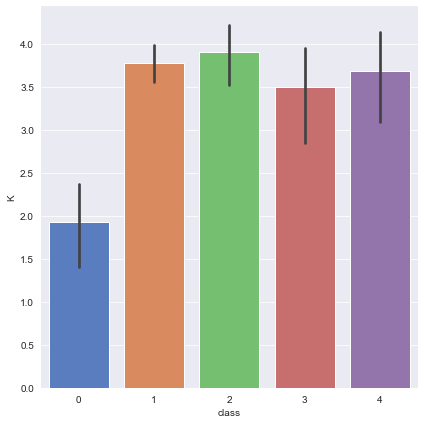

In [165]:
g = sns.factorplot(x = "class", y = "K", data = train_X1, size= 6, kind = "bar",palette = "muted")
g.despine(left = True)
g = g.set_ylabels("K")

class 1,2,3,4에는 유의미한 차이가 존재하지 않지만, -10% 이상의 수익률 보여주는 class0은 roe 지표가 확연히 낮은 경향을 보인다. (유의미)

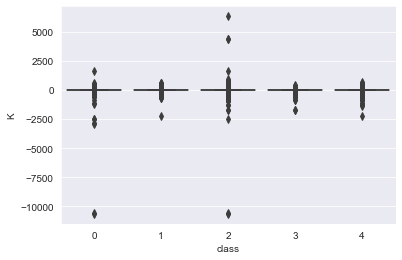

In [155]:
sns.boxplot(x = 'class', y = 'K', data = train_X)

위의 boxplot은 수익률 지표인 ER의 이상치 제거 전 데이터를 사용한 것이다. CLASS 2일때 K값이 비정상적으로 높은 이상치가 꽤있다는 것을 확인 할 수 있었지만 중앙값은 대체로 같다는 사실도 확인 할 수 있다.

### L (과거 ROA(%))

ROA : 순이익 / 총 자산 (총자산이익률), 높을수록 이익의 질이 높다고 볼 수 있지만, 부채비율도 감안해야함. 

부채가 높아 ROA지표도 높아진 것 이라면 보수적 관점으로 접근필요

일단 높을수록 좋다고 생각할 수 있다.

C:\Users\jlee0\AppData\Roaming\Python\Python37\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


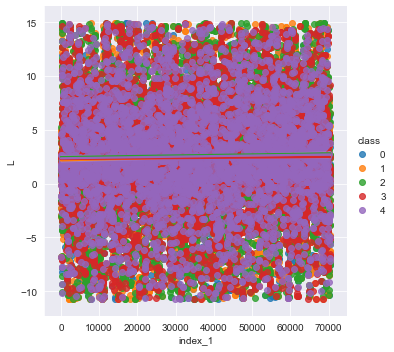

In [173]:
# L 값에 대한 이상치를 제거
train_X1 = delete_outlier('L')

# ER을 통해 나눈 CLASS에 대해서 분포도를 그려봄

sns.lmplot(x = 'index_1',y = 'L', data=train_X1, hue = 'class')
plt.show()

C:\Users\jlee0\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


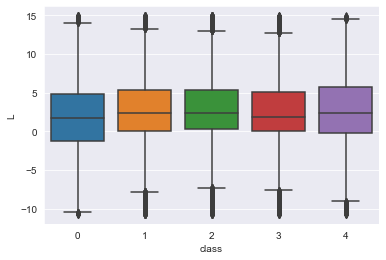

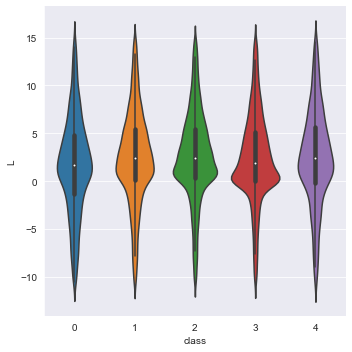

In [174]:
sns.boxplot(x = 'class', y = 'L', data = train_X1)
g = sns.factorplot(x = "class", y = "L", data =train_X1, kind = "violin")

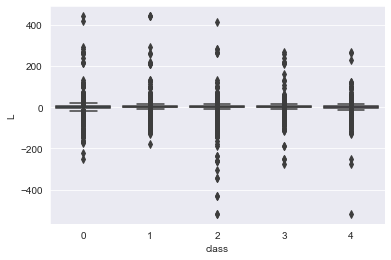

In [175]:
sns.boxplot(x = 'class', y = 'L', data = train_X)

C:\Users\jlee0\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\jlee0\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


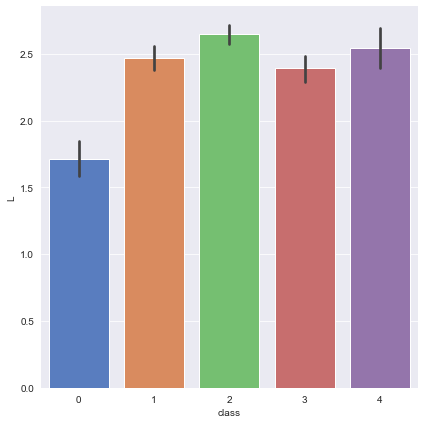

In [176]:
g = sns.factorplot(x = "class", y = "L", data = train_X1, size= 6, kind = "bar",palette = "muted")
g.despine(left = True)
g = g.set_ylabels("L")

ROE 지표와 마찬가지로 class0을 구별하는데 큰 역할을 한다.

ROE, ROA지표의 개념이 매우 유사하기 때문에 경향성도 비슷한 듯 하다.

후에 HEATMAP을 통해 유사도를 확인해보고 결과에 따라 유사도가 높다면 더 보편적인 지표인 ROE를 사용하겠다.

### 